In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from numpy.random import seed
from numpy.random import randn
from statsmodels.graphics.gofplots import qqplot
from IPython.display import display, HTML # used to print out pretty pandas dataframes
import analysis_helper
display(HTML("<style>.container { width:100% !important; }</style>")) # widest display
import matplotlib.dates as dates
import matplotlib.lines as mlines
pd.options.display.max_colwidth = 1000
pd.options.display.width = 1000
pd.options.display.max_columns = 1000
pd.options.display.max_rows = 3

fig, axes = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(13, 5)


%matplotlib inline
plt.style.use('ggplot') 

In [2]:
reload(analysis_helper)
import analysis_helper

In [3]:
data_path = 'phaseone_v0.csv'
data = analysis_helper.Data(pth=data_path)

adding days to primary outcomes...
finding mortalities...
splitting into opiate/nonopiate samples...


analysis_helper.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df['icu_los_days'] = df['icu_los_hours'] / hours
analysis_helper.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df['hospital_los_days'] = df['hospital_los_hours'] / hours
analysis_helper.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df['

## Explore distributions
- Relative to primary outcomes of LOS in ICU and hospital
- Relative to secondary outcomes of mortality 30d, 1yr
- Look at plots
    - histogram
    - box plot
    - qq plot
- Descriptive statistics
    - mean
    - median
    - std dev
    - variance##
- Try out some tests
    - test for normality 
    - mann whitney u test
    - CI for MU tests

## ICU Length of Stay 

In [4]:
reload(analysis_helper)
import analysis_helper

#### exploration

			*** Info for: non_opiate group ***
			--- Descriptive Stats --- 
 N=23543 MEAN=3.730429867 MEDIAN=2.0453587963 STD.DEV=5.51112735412 VARIANCE=30.3725247134

			***Info for: opiate group ***
			--- Descriptive Stats --- 
 N=3114 MEAN=3.99247196056 MEDIAN=2.1609375 STD.DEV=5.64551347107 VARIANCE=31.871822352

					{HISTOGRAMS}


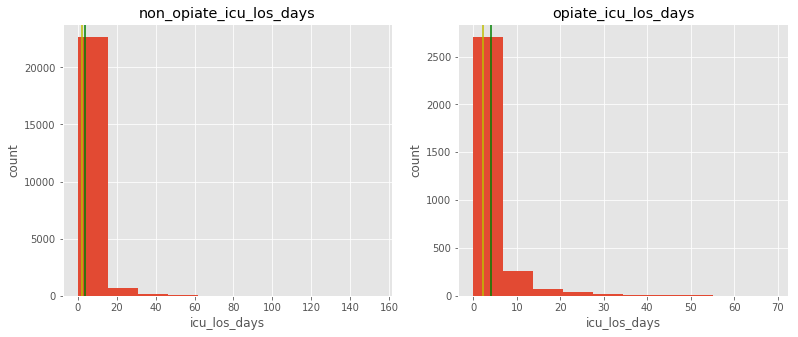

In [6]:
analysis_helper.plot_hist(data, col='icu_los_days')

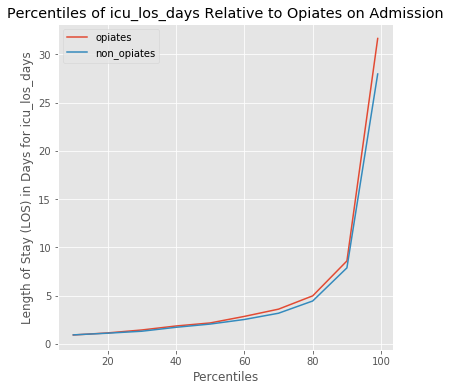

In [7]:
analysis_helper.plot_percents(data, col='icu_los_days')

#### normality testing
- QQ plots
- KS test

					{Q-Q PLOTS}


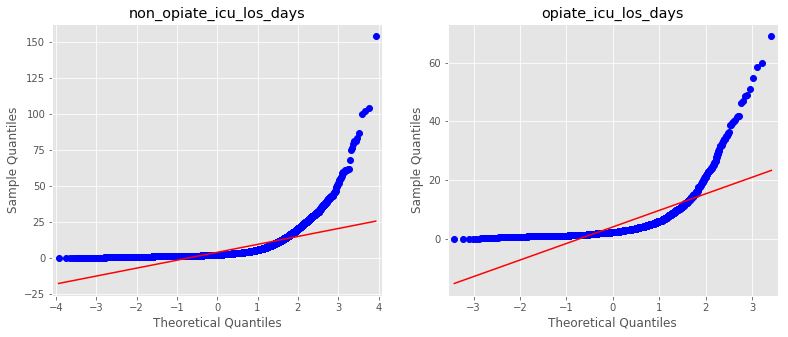


			{Kolmogorov-Smirnov Test for Normality}
Non opiate samples
Pval=0.0 less than alpha=0.050. Different distribution (reject H0)
Opiate samples
Pval=1.0070050150606807e-181 less than alpha=0.050. Different distribution (reject H0)


In [8]:
analysis_helper.plot_qq(data, col='icu_los_days')
analysis_helper.do_normality(data, col='icu_los_days')

#### statistical test
- mann whitney u test

In [9]:
analysis_helper.do_mannwhitney(data, col='icu_los_days')


			{Mann Whitney U-test Comparing icu_los_days between opiate/non-opiate use on admission}
Statistics=38336524.5, p=0.000
Pval=1.5699143924917438e-05 less than alpha=0.050. Different distribution (reject H0)


## Hospital Length of Stay 

#### exploration

			*** Info for: non_opiate group ***
			--- Descriptive Stats --- 
 N=23543 MEAN=9.39355897837 MEDIAN=6.76944444446 STD.DEV=9.21225526591 VARIANCE=84.8656470843

			***Info for: opiate group ***
			--- Descriptive Stats --- 
 N=3114 MEAN=10.9815751445 MEDIAN=7.80381944444 STD.DEV=10.9296693829 VARIANCE=119.45767282

					{HISTOGRAMS}


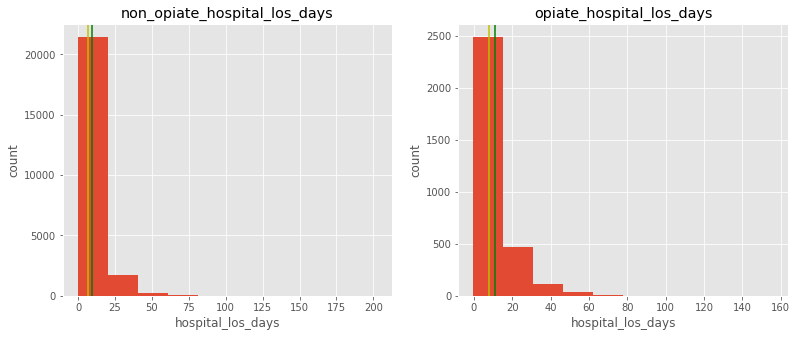

In [10]:
analysis_helper.plot_hist(data, col='hospital_los_days')

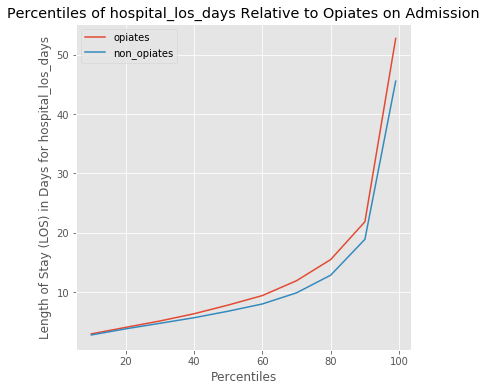

In [11]:
analysis_helper.plot_percents(data, col='hospital_los_days')

#### normality testing
- QQ plots
- KS test

					{Q-Q PLOTS}


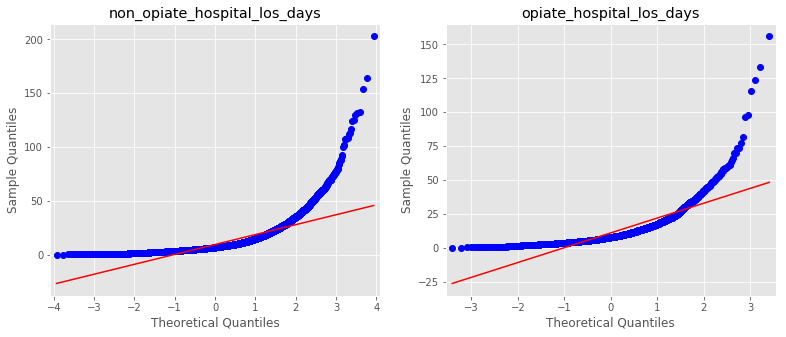


			{Kolmogorov-Smirnov Test for Normality}
Non opiate samples
Pval=0.0 less than alpha=0.050. Different distribution (reject H0)
Opiate samples
Pval=2.0855673507837128e-79 less than alpha=0.050. Different distribution (reject H0)


In [12]:
analysis_helper.plot_qq(data, col='hospital_los_days')
analysis_helper.do_normality(data, col='hospital_los_days')

#### statistical test
- mann whitney u test

In [31]:
analysis_helper.do_mannwhitney(data, col='hospital_los_days')


			{Mann Whitney U-test Comparing hospital_los_days between opiate/non-opiate use on admission}
Statistics=40320783.5, p=0.000
Pval=5.4333271428532e-20 less than alpha=0.050. Different distribution (reject H0)


### 30 day mortality

In [14]:
reload(analysis_helper)
import analysis_helper

#### exploration

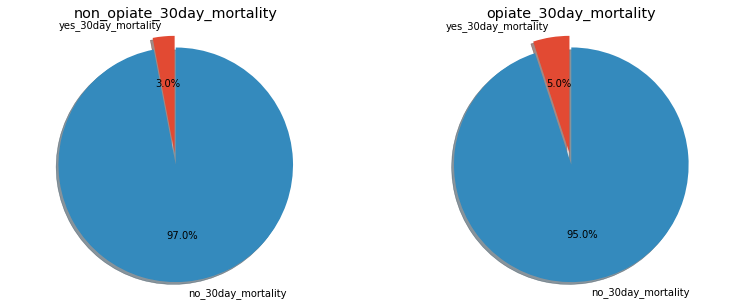

In [15]:
analysis_helper.pie_chart(data, col='30day_mortality')

### get contingency table

In [16]:
tuples_thirty_day, arr_thirty_day = analysis_helper.create_table(data, col='30day_mortality')

#### chi square analysis

In [17]:
analysis_helper.do_chisquare(table=arr_thirty_day)

observed data=[[154, 2960], [714, 22829]]
expected data=[[  101.39745658  3012.60254342]
 [  766.60254342 22776.39745658]]
Statistics=31.334085646210177, p=0.000
Pval=2.17232064156766e-08 less than alpha=0.050. Different distribution (reject H0)


#### odds ratios

In [18]:
analysis_helper.do_odds_ratio(group=tuples_thirty_day, name='30day_mortality')

Odds Ratio: 1.663
Subjects with opiates on admission have 1.663 times the odds of 30day_mortality compared to those without opiates on admission
95% CI for Odds Ratio: [1.392, 1.988]


### 1 year mortality

#### exploration

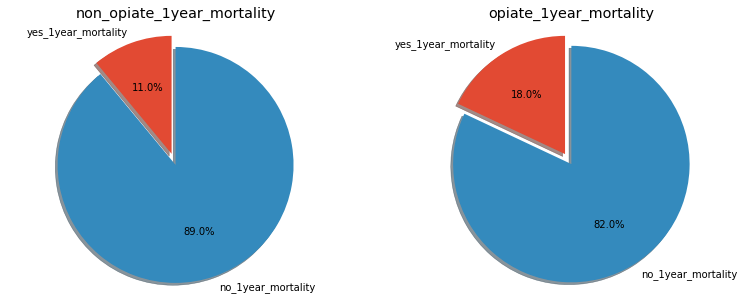

In [19]:
analysis_helper.pie_chart(data, col='1year_mortality')

### contigency table

In [20]:
tuples_one_year, arr_one_year = analysis_helper.create_table(data, col='1year_mortality')

#### chi square analysis

In [21]:
analysis_helper.do_chisquare(arr_one_year)

observed data=[[557, 2557], [2698, 20845]]
expected data=[[  380.24046217  2733.75953783]
 [ 2874.75953783 20668.24046217]]
Statistics=105.37915001303591, p=0.000
Pval=1.0086564300893915e-24 less than alpha=0.050. Different distribution (reject H0)


#### odds ratios

In [22]:
analysis_helper.do_odds_ratio(group=tuples_one_year, name='1year_mortality')

Odds Ratio: 1.683
Subjects with opiates on admission have 1.683 times the odds of 1year_mortality compared to those without opiates on admission
95% CI for Odds Ratio: [1.523, 1.860]


## stats on mortality in same admission (ICU, HOS)

In [535]:
df_mort[df_mort.icu_death == 1]

,intime,outtime,hospital_intime,hospital_outtime,dod,icu_death
3,2149-11-09 13:07:02,2149-11-14 20:52:14,2149-11-09 13:06:00,2149-11-14 10:15:00,2149-11-14,1
...,...,...,...,...,...,...
32373,2139-07-14 02:32:21,2139-07-19 18:39:56,2139-07-14 02:31:00,2139-07-19 05:20:00,2139-07-19,1


In [539]:
df_mort[df_mort.hos_death == 1]

,intime,outtime,hospital_intime,hospital_outtime,dod,icu_death,hos_death
3,2149-11-09 13:07:02,2149-11-14 20:52:14,2149-11-09 13:06:00,2149-11-14 10:15:00,2149-11-14,1,1
...,...,...,...,...,...,...,...
32373,2139-07-14 02:32:21,2139-07-19 18:39:56,2139-07-14 02:31:00,2139-07-19 05:20:00,2139-07-19,1,1


## New output dataframe
    - no readmits in ICU
    - no mortality within admission
    

In [50]:
# outputfile = 'phaseone_v1.csv'
# df_output = data._Data__clean_df
# df_output.to_csv(outputfile)